# Project_Break_II_ML

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', None)

Importing Personalized Tools

In [3]:
import sys
import os

sys.path.append(os.path.abspath('src'))

from utils.User_Functions import *

In [4]:
try_GPU()

Using GPU


In [5]:
df_flights = pd.read_csv("./src/data/US_flights_2023.csv")
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 24 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightDate          object
 1   Day_Of_Week         int64 
 2   Airline             object
 3   Tail_Number         object
 4   Dep_Airport         object
 5   Dep_CityName        object
 6   DepTime_label       object
 7   Dep_Delay           int64 
 8   Dep_Delay_Tag       int64 
 9   Dep_Delay_Type      object
 10  Arr_Airport         object
 11  Arr_CityName        object
 12  Arr_Delay           int64 
 13  Arr_Delay_Type      object
 14  Flight_Duration     int64 
 15  Distance_type       object
 16  Delay_Carrier       int64 
 17  Delay_Weather       int64 
 18  Delay_NAS           int64 
 19  Delay_Security      int64 
 20  Delay_LastAircraft  int64 
 21  Manufacturer        object
 22  Model               object
 23  Aicraft_age         int64 
dtypes: int64(11), object(13)
memory usage: 1.2+ GB


In [6]:
df_weather = pd.read_csv("./src/data/weather_meteo_by_airport.csv")
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132860 entries, 0 to 132859
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        132860 non-null  object 
 1   tavg        132860 non-null  float64
 2   tmin        132860 non-null  float64
 3   tmax        132860 non-null  float64
 4   prcp        132860 non-null  float64
 5   snow        132860 non-null  float64
 6   wdir        132860 non-null  float64
 7   wspd        132860 non-null  float64
 8   pres        132860 non-null  float64
 9   airport_id  132860 non-null  object 
dtypes: float64(8), object(2)
memory usage: 10.1+ MB


In [7]:
df_location = pd.read_csv("./src/data/airports_geolocation.csv")
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  364 non-null    object 
 1   AIRPORT    364 non-null    object 
 2   CITY       364 non-null    object 
 3   STATE      364 non-null    object 
 4   COUNTRY    364 non-null    object 
 5   LATITUDE   364 non-null    float64
 6   LONGITUDE  364 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.0+ KB


In [8]:
# Converting FlightDate and time to datetime
df_flights['FlightDate'] = pd.to_datetime(df_flights['FlightDate'], errors='coerce')
df_weather['time'] = pd.to_datetime(df_weather['time'], errors='coerce')

# Merging DataFrames df_flights, df_location, df_weather
merged_df = pd.merge(df_flights, df_location,
                    how='left',
                    left_on=['Dep_Airport'],
                    right_on=['IATA_CODE'])

merged_df = pd.merge(merged_df, df_weather,
                      how='left',
                      left_on=['Dep_Airport', 'FlightDate'],
                      right_on=['airport_id', 'time'])



In [9]:
# # Realizando o segundo merge (Voos + Meteorologia + Localização)
# final_df = pd.merge(merged_df, location_df,
#                      how='left',
#                      left_on=['Dep_Airport'],
#                      right_on=['IATA_CODE'])

# # Verificando o resultado do segundo merge
# print(final_df.head())

In [10]:
merged_df.sample(3)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id
395903,2023-01-18,3,Republic Airways,N751YX,IAD,"Washington, DC",Evening,-7,0,Low <5min,PIT,"Pittsburgh, PA",-19,Low <5min,61,Short Haul >1500Mi,0,0,0,0,0,EMBRAER,170/175,7,IAD,Washington Dulles International Airport,Chantilly,VA,USA,38.94453,-77.45581,2023-01-18,8.6,4.4,14.4,0.0,0.0,318.0,13.7,1012.8,IAD
5140303,2023-10-05,4,JetBlue Airways,N563JB,BOS,"Boston, MA",Afternoon,13,1,Low <5min,RDU,"Raleigh/Durham, NC",34,Medium >15min,157,Short Haul >1500Mi,13,0,21,0,0,AIRBUS,A320,21,BOS,Gen. Edward Lawrence Logan International Airport,Boston,MA,USA,42.36435,-71.00518,2023-10-05,18.8,15.6,23.9,0.0,0.0,132.0,10.4,1023.7,BOS
1295772,2023-03-06,1,Spirit Air Lines,N954NK,DTW,"Detroit, MI",Morning,-5,0,Low <5min,PHX,"Phoenix, AZ",28,Medium >15min,302,Medium Haul <3000Mi,0,0,28,0,0,AIRBUS,A320,2,DTW,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,2023-03-06,2.5,1.1,5.6,13.8,30.0,67.0,18.6,1018.5,DTW


In [11]:
# Dropping redundant and unnecessary columns
merged_df.drop(columns=["IATA_CODE", "AIRPORT", "CITY", "STATE", "COUNTRY", "time", "airport_id"], inplace=True)

In [12]:
merged_df['Month'] = merged_df['FlightDate'].dt.month
merged_df['Day'] = merged_df['FlightDate'].dt.day
merged_df.sample(2)


,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age,LATITUDE,LONGITUDE,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Month,Day
2973197,2023-06-26,1,American Eagle Airlines Inc.,N232NN,CMH,"Columbus, OH",Morning,-1,0,Low <5min,MIA,"Miami, FL",-11,Low <5min,149,Short Haul >1500Mi,0,0,0,0,0,EMBRAER,170/175,8,39.99799,-82.89188,23.1,19.4,26.1,3.6,0.0,237.0,19.2,1003.3,6,26
1416202,2023-03-30,4,Southwest Airlines Co.,N8511K,SJU,"San Juan, PR",Morning,-1,0,Low <5min,FLL,"Fort Lauderdale, FL",-1,Low <5min,170,Short Haul >1500Mi,0,0,0,0,0,BOEING,737 NG,8,18.43942,-66.00183,25.4,22.2,30.6,3.6,0.0,59.0,12.6,1017.7,3,30


In [13]:
features_num, features_cat, features_id = type_features(merged_df)

print("Numerical features:", features_num)
print("Categorical features:", features_cat)
print("ID features (numeric categoricals):", features_id)

Numerical features: ['Day_Of_Week', 'Dep_Delay', 'Dep_Delay_Tag', 'Arr_Delay', 'Flight_Duration', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft', 'Aicraft_age', 'LATITUDE', 'LONGITUDE', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres', 'Month', 'Day']
Categorical features: ['Airline', 'Tail_Number', 'Dep_Airport', 'Dep_CityName', 'DepTime_label', 'Dep_Delay_Type', 'Arr_Airport', 'Arr_CityName', 'Arr_Delay_Type', 'Distance_type', 'Manufacturer', 'Model']
ID features (numeric categoricals): []


In [14]:
features_num = ["Month", "Day", "Day_Of_Week", "Dep_Delay", "Aicraft_age", "Delay_Carrier",  
                "Delay_Weather","Delay_NAS", "Delay_Security", "Delay_LastAircraft", 'LATITUDE', 'LONGITUDE',
                "tmin", "tmax", "prcp", "snow", "wdir", "wspd", "pres"]

features_cat = ["Airline", "Tail_Number", "Dep_Airport", "DepTime_label", "Arr_Airport", "Distance_type", 
                "Manufacturer", "Model", ]

features_id = []

categorical_features = features_cat



In [15]:
merged_df.sample(2)

,FlightDate,Day_Of_Week,Airline,Tail_Number,Dep_Airport,Dep_CityName,DepTime_label,Dep_Delay,Dep_Delay_Tag,Dep_Delay_Type,Arr_Airport,Arr_CityName,Arr_Delay,Arr_Delay_Type,Flight_Duration,Distance_type,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,Manufacturer,Model,Aicraft_age,LATITUDE,LONGITUDE,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,Month,Day
3441882,2023-07-24,1,Delta Air Lines Inc,N938AT,STL,"St. Louis, MO",Evening,40,1,Medium >15min,MSP,"Minneapolis, MN",29,Medium >15min,84,Short Haul >1500Mi,29,0,0,0,0,BOEING,717,18,38.74769,-90.35999,26.8,21.1,33.3,0.0,0.0,307.0,6.2,1015.5,7,24
2691182,2023-05-24,3,United Air Lines Inc.,N14704,EWR,"Newark, NJ",Morning,7,1,Low <5min,CLT,"Charlotte, NC",-4,Low <5min,104,Short Haul >1500Mi,0,0,0,0,0,BOEING,737 NG,26,40.69250,-74.16866,17.1,10.1,26.3,0.0,0.0,346.0,7.2,1018.1,5,24


In [16]:
# df = merged_df.copy()

# for col in features_id:
#     df[col] = df[col].astype(str)

In [17]:
target_reg = "Arr_Delay"

In [18]:
df = merged_df.copy()
df = df[features_num + features_cat + [target_reg]].copy()
df.isnull().sum()

Month                 0
Day                   0
Day_Of_Week           0
Dep_Delay             0
Aicraft_age           0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
LATITUDE              0
LONGITUDE             0
tmin                  0
tmax                  0
prcp                  0
snow                  0
wdir                  0
wspd                  0
pres                  0
Airline               0
Tail_Number           0
Dep_Airport           0
DepTime_label         0
Arr_Airport           0
Distance_type         0
Manufacturer          0
Model                 0
Arr_Delay             0
dtype: int64

<Axes: >

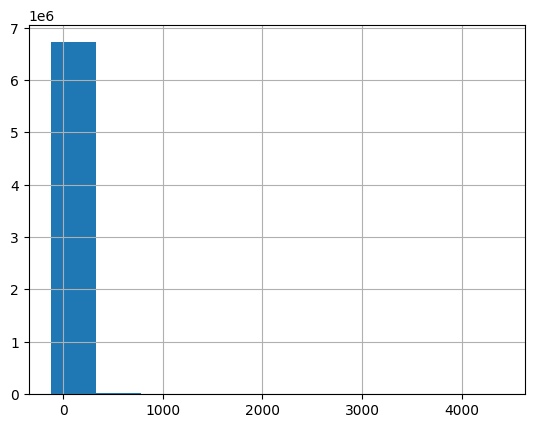

In [19]:
df[target_reg].hist()

In [20]:
from sklearn.utils import resample

# Random subsampling
data_sample = resample(df, replace=False, n_samples=int(len(df) * 0.25), random_state=42)

print("Original Dataset size:", len(df))
print("Dataset size after subsampling:", len(data_sample))

Original Dataset size: 6743404
Dataset size after subsampling: 1685851


### Target Encoding with K-Fold

The **`target_encoding_kfold`** function applies **Target Encoding** with **K-Fold Cross Validation** to prevent **data leakage** during training, ensuring the model only learns from training data.

---

#### Key Steps:

1. **K-Fold Validation**:
   - Splits the training data into **n_splits** (default 5) using **StratifiedKFold** to ensure balanced target distribution.
   - Prevents **data leakage** by ensuring encoding is only based on training data.

2. **Resetting Indices**:
   - Resets indices in both train and validation sets to avoid **index misalignment** when applying target encoding.

3. **Smoothing**:
   - Calculates the category mean with a smoothing technique that combines the category mean with the global mean to handle sparse categories.

4. **Mapping and Handling Unseen Categories**:
   - Categories in validation and test sets are **mapped** to the calculated target mean; missing categories are assigned the **global mean** to avoid errors.

---

#### Why K-Fold?

- **K-Fold** ensures that encoding is done only with training data, preventing future data from contaminating the model and causing **data leakage**.

---

This approach guarantees **robust target encoding**, preserves model integrity, and prevents **overfitting**.


In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_sample, test_size=0.2, random_state=42)
print(train_set.shape)
print(test_set.shape)

(1348680, 28)
(337171, 28)


In [22]:
# Check non correspondenting values in test set/train set
non_correspondence = {col: {'unique': [], 'absolute': []} for col in categorical_features}

# Iterate over the categorical columns
for col in categorical_features:
    # Identify unique values in test_set that are not in train_set
    test_values = set(test_set[col])
    train_values = set(train_set[col])
    
    # Values in test_set but not in train_set
    non_matching_values = test_values - train_values
    
    # Count the number of unique values and the absolute count of these values
    non_correspondence[col]['unique'] = len(non_matching_values)
    non_correspondence[col]['absolute'] = sum(test_set[col].isin(non_matching_values))
    
# Convert the dictionary to a DataFrame
non_correspondence_df = pd.DataFrame(non_correspondence)
non_correspondence_df



,Airline,Tail_Number,Dep_Airport,DepTime_label,Arr_Airport,Distance_type,Manufacturer,Model
unique,0,2,0,0,0,0,0,0
absolute,0,2,0,0,0,0,0,0


In [23]:
# Subamostragem temporária para reduzir número de dados no treinamento e agilizar
from sklearn.utils import resample

# Random subsampling: reduces the training set size to 50%
train_set_subsampled = resample(train_set, replace=False, n_samples=int(len(train_set) * 0.2), random_state=42)

print("Original training set size:", len(train_set))
print("Training set size after subsampling:", len(train_set_subsampled))


Original training set size: 1348680
Training set size after subsampling: 269736


In [24]:
from sklearn.model_selection import KFold

def target_encoding_kfold_regression(train_set, test_set, categorical_features, target, n_splits=5, smoothing=0.3, seed=42):
    """
    Applies Target Encoding with K-Fold for regression to prevent data leakage.
    
    Parameters:
    - train_set: Training DataFrame
    - test_set: Testing DataFrame
    - categorical_features: List of categorical columns to be encoded
    - target: Name of the target variable (continuous)
    - n_splits: Number of splits for cross-validation
    - smoothing: Smoothing factor to avoid overfitting
    - seed: Random seed for reproducibility
    
    Returns:
    - Encoded train_set
    - Encoded test_set
    """
    # Use KFold instead of StratifiedKFold for regression
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    
    # Initialize the DataFrame to store the encoded results
    train_encoded = train_set.copy()
    test_encoded = test_set.copy()
    
    # Initialize a list to collect all the new target encoding columns
    encoded_columns = []
    
    # Calculate the global mean of the target
    global_mean = train_set[target].mean()
    
    for col in categorical_features:
        # Create a dictionary to store the category means
        category_means = {}
        
        # Create the new column for target encoding
        train_encoded[col + "_te"] = 0.0
        test_encoded[col + "_te"] = 0.0
        
        # Add the new column to the list of encoded columns
        encoded_columns.append(col + "_te")
        
        # Loop through the folds
        for train_idx, valid_idx in kf.split(train_set):
            # Split into train and validation
            train_fold = train_set.iloc[train_idx]
            valid_fold = train_set.iloc[valid_idx].copy()  
            valid_fold.reset_index(drop=True, inplace=True)

            # Calculate the mean and count of the target for each category
            category_stats = train_fold.groupby(col, observed=False)[target].agg(['mean', 'count'])
            category_means_smooth = (category_stats['mean'] * category_stats['count'] + global_mean * smoothing) / (category_stats['count'] + smoothing)
            
            # Update the dictionary with the smoothed means
            category_means.update(category_means_smooth.to_dict())
            
            # Apply target encoding to the validation fold using .map(), ensuring proper indexing
            train_encoded.reset_index(drop=True, inplace=True)
            train_encoded.loc[valid_idx, col + "_te"] = valid_fold[col].map(category_means).fillna(global_mean).values
        
        # Apply target encoding to the test set, making sure missing categories are handled with global_mean
        test_encoded[col + "_te"] = test_set[col].map(category_means).fillna(global_mean).values
        
    return train_encoded, test_encoded, encoded_columns



In [25]:
train_encoded, test_encoded, encoded_columns = target_encoding_kfold_regression(train_set_subsampled, test_set, categorical_features, target_reg, n_splits=5, smoothing=0.3, seed=42)


Testing with manual verification

In [26]:
col = "Airline"  # Choose a categorical column
chosen_category = "American Airlines Inc."  # Choose a specific category

# Filter the training set only for this category
df_category = train_set[train_set[col] == chosen_category]

# Manual calculation
count = len(df_category)
mean = df_category[target_reg].mean()
smoothing_factor = 0.3
global_mean = train_set[target_reg].mean()

category_te_manual = (mean * count + global_mean * smoothing_factor) / (count + smoothing_factor)

print("Manually expected value:", category_te_manual)
print("Value assigned in train_encoded:", train_encoded[train_encoded[col] == chosen_category][col + "_te"].unique())



Manually expected value: 12.217784902934545
Value assigned in train_encoded: [11.44576859 11.47936732 12.04466805 11.36714655 11.96166033]


In [27]:
X_train_encoded = train_encoded[features_num + encoded_columns].copy()
X_test_encoded = test_encoded[features_num + encoded_columns].copy()
y_train = train_encoded[target_reg]
y_test = test_encoded[target_reg]


print("X_train_encoded:", X_train_encoded.shape)
print("y_train:", y_train.shape)

print("X_test_encoded:", X_test_encoded.shape)
print("y_test:",y_test.shape)

X_train_encoded: (269736, 27)
y_train: (269736,)
X_test_encoded: (337171, 27)
y_test: (337171,)


In [28]:
train_encoded.columns

Index(['Month', 'Day', 'Day_Of_Week', 'Dep_Delay', 'Aicraft_age',
       'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security',
       'Delay_LastAircraft', 'LATITUDE', 'LONGITUDE', 'tmin', 'tmax', 'prcp',
       'snow', 'wdir', 'wspd', 'pres', 'Airline', 'Tail_Number', 'Dep_Airport',
       'DepTime_label', 'Arr_Airport', 'Distance_type', 'Manufacturer',
       'Model', 'Arr_Delay', 'Airline_te', 'Tail_Number_te', 'Dep_Airport_te',
       'DepTime_label_te', 'Arr_Airport_te', 'Distance_type_te',
       'Manufacturer_te', 'Model_te'],
      dtype='object')

#### StandartScaling

In [29]:
X_train_scaled, X_test_scaled = scale_features(X_train_encoded, X_test_encoded)

In [30]:
X_train_scaled.sample()

,Month,Day,Day_Of_Week,Dep_Delay,Aicraft_age,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_LastAircraft,LATITUDE,LONGITUDE,tmin,tmax,prcp,snow,wdir,wspd,pres,Airline_te,Tail_Number_te,Dep_Airport_te,DepTime_label_te,Arr_Airport_te,Distance_type_te,Manufacturer_te,Model_te
229903,0.117265,-0.311719,0.007354,-0.358159,0.956293,-0.145978,-0.051356,-0.179604,-0.019936,-0.188789,-0.383445,0.905653,1.249112,0.975689,0.269415,-0.103363,-0.03502,-0.227851,-0.146736,-0.830407,-0.45236,-1.380701,-1.121685,-0.779964,0.362146,-0.744618,-0.672192


### Feature Selection with ANOVA e FSTS

Selection of variables with high statistical significance in relation to the target (p-value < 0.01)

In [31]:
# ANOVA

from sklearn.feature_selection import f_classif

# Perform ANOVA on training data
f_scores, p_values = f_classif(X_train_scaled, y_train)

# Store results in a DataFrame
anova_results = pd.DataFrame({"Feature": X_train_scaled.columns, "F-Score": f_scores, "p-value": p_values})

# Select features with p-value < 0.05
selected_features_anova = anova_results[anova_results["p-value"] < 0.01]["Feature"].tolist()

print("Selected Features after ANOVA:", selected_features_anova)

Selected Features after ANOVA: ['Month', 'Day', 'Day_Of_Week', 'Dep_Delay', 'Aicraft_age', 'Delay_Carrier', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft', 'LATITUDE', 'LONGITUDE', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres', 'Airline_te', 'Tail_Number_te', 'Dep_Airport_te', 'DepTime_label_te', 'Arr_Airport_te', 'Distance_type_te', 'Manufacturer_te', 'Model_te']


Exclude highly correlated and redundant columns (corr > 0.7). 

To select which of the correlated columns will be kept, a correlation analysis with respect to the target will be performed to retain the variable most related to class 1.

In [32]:
# FSTS

# Compute the correlation matrix using ANOVA-selected features
corr_matrix = X_train_scaled[selected_features_anova].corr().abs()

# Calculate the correlation of each feature with the target variable
correlation_with_target = X_train_scaled[selected_features_anova].corrwith(y_train).abs()

# Initialize a list to store features to drop
to_drop = []

# Iterate through the correlation matrix to identify highly correlated features
upper = np.triu(corr_matrix, k=1)  # Upper triangle of the correlation matrix

for column in corr_matrix.columns:
    # Check if any other feature is highly correlated with the current column
    correlated_columns = corr_matrix.columns[upper[:, corr_matrix.columns.get_loc(column)] > 0.7]
    
    for correlated_column in correlated_columns:
        # Compare correlation with the target variable (y_train)
        if correlation_with_target[column] >= correlation_with_target[correlated_column]:
            # Drop the correlated column if the current column is more correlated with the target
            to_drop.append(correlated_column)
        else:
            # Otherwise, drop the current column
            to_drop.append(column)

# Remove duplicates from the list of features to drop
to_drop = list(set(to_drop))

# Print the features that are being dropped due to high correlation with each other
print("Features to be dropped due to high correlation:", to_drop)

# Final feature selection after FSTS, keeping the variables that are not dropped
selected_features_fsts = [f for f in selected_features_anova if f not in to_drop]

print("Selected Features after FSTS:", selected_features_fsts)

Features to be dropped due to high correlation: ['Manufacturer_te', 'Delay_Carrier', 'tmax']
Selected Features after FSTS: ['Month', 'Day', 'Day_Of_Week', 'Dep_Delay', 'Aicraft_age', 'Delay_Weather', 'Delay_NAS', 'Delay_Security', 'Delay_LastAircraft', 'LATITUDE', 'LONGITUDE', 'tmin', 'prcp', 'snow', 'wspd', 'pres', 'Airline_te', 'Tail_Number_te', 'Dep_Airport_te', 'DepTime_label_te', 'Arr_Airport_te', 'Distance_type_te', 'Model_te']


In [33]:
X_train_selected = X_train_scaled[selected_features_fsts].copy()
X_test_selected = X_test_scaled[selected_features_fsts].copy()

X_train_encoded = X_train_encoded[selected_features_fsts].copy()
X_test_encoded = X_test_encoded[selected_features_fsts].copy()

### Models Baseline

Models with standarized data

In [34]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define regression models with default hyperparameters
models = {
    "RidgeRegression": Ridge(alpha=1.0),   
    "LassoRegression": Lasso(alpha=0.1),  # L1 regularization
    #"SVR": SVR(kernel='rbf'),  
    #"KNNRegressor": KNeighborsRegressor(n_neighbors=5) 
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)

    return (y_pred_train, y_pred_test, train_rmse, train_r2, test_rmse, test_r2)

# Loop through each model and evaluate it
for model_name, model in models.items():
    print(f"Evaluating {model_name}...\n")

    (y_pred_train, y_pred_test, train_rmse, train_r2, test_rmse, test_r2) = evaluate_model(model, X_train_selected, y_train, X_test_selected, y_test)

    print("Train Metrics:")
    print(f"RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
    print("-" * 60)

    print("Test Metrics:")
    print(f"RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")
    print("=" * 60)



Evaluating RidgeRegression...

Train Metrics:
RMSE: 12.2938, R²: 0.9502
------------------------------------------------------------
Test Metrics:
RMSE: 12.4424, R²: 0.9523
Evaluating LassoRegression...

Train Metrics:
RMSE: 12.3020, R²: 0.9502
------------------------------------------------------------
Test Metrics:
RMSE: 12.4466, R²: 0.9523


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define regression models with default hyperparameters
models = {
    # "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "XGBoostRegressor": XGBRegressor(random_state=42),
    # "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "LightGBMRegressor": lgb.LGBMRegressor(random_state=42)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Train the model and evaluate its performance using RMSE and R².
    """
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute performance metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_r2 = r2_score(y_train, y_pred_train)

    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)

    # Print results
    print(f"Model: {model.__class__.__name__}")
    print(f"Train RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")
    print("=" * 60)

# Iterate over each model and evaluate its performance
for model_name, model in models.items():
    print(f"Evaluating {model_name}...\n")
    evaluate_model(model, X_train_encoded, y_train, X_test_encoded, y_test)




Evaluating XGBoostRegressor...

Model: XGBRegressor
Train RMSE: 10.2873, R²: 0.9652
Test RMSE: 20.0713, R²: 0.8758
Evaluating LightGBMRegressor...

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3505
[LightGBM] [Info] Number of data points in the train set: 269736, number of used features: 23
[LightGBM] [Info] Start training from score 6.429987
Model: LGBMRegressor
Train RMSE: 9.8042, R²: 0.9684
Test RMSE: 10.0669, R²: 0.9688


In [38]:
from hyperopt import fmin, tpe, hp, Trials
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import logging

# Suppress LightGBM output by setting the verbosity to -1
logging.getLogger("lightgbm").setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

# Define the objective function to minimize
def objective(params):
    model = lgb.LGBMRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        num_leaves=int(params['num_leaves']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        random_state=42
    )
    
    # Train the model
    model.fit(X_train_encoded, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_encoded)
    y_pred_test = model.predict(X_test_encoded)

    # Calculate RMSE and R² for the validation set
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_r2 = r2_score(y_test, y_pred_test)
    
    # We want to minimize the RMSE
    return {'loss': test_rmse, 'status': 'ok'}

# Define the hyperparameter space to search
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10),
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'num_leaves': hp.quniform('num_leaves', 20, 100, 5),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0)
}

# Set up the trials object to store results
trials = Trials()

# Run the hyperparameter search
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=trials)

# Print the best hyperparameters found
print("Best Hyperparameters:", best)

lgb.set_verbosity(-1)

# Retrain the best model using the optimal hyperparameters
best_model = lgb.LGBMRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    num_leaves=int(best['num_leaves']),
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    random_state=42
)

# Train the best model and evaluate
best_model.fit(X_train_encoded, y_train)
y_pred_train_best = best_model.predict(X_train_encoded)
y_pred_test_best = best_model.predict(X_test_encoded)

# Evaluate performance metrics for the best model
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_pred_train_best))
train_r2_best = r2_score(y_train, y_pred_train_best)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_test_best))
test_r2_best = r2_score(y_test, y_pred_test_best)

print(f"Best Model (Train) RMSE: {train_rmse_best:.4f}, R²: {train_r2_best:.4f}")
print(f"Best Model (Test) RMSE: {test_rmse_best:.4f}, R²: {test_r2_best:.4f}")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3505                     
[LightGBM] [Info] Number of data points in the train set: 269736, number of used features: 23
[LightGBM] [Info] Start training from score 6.429987  
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3505                                               
[LightGBM] [Info] Number of data points in the train set: 269736, number of used features: 23
[LightGBM] [Info] Start training from score 6.429987                            
[L

Exception ignored on calling ctypes callback function
: 
<function _log_callback at 0x0000023EA438D8B0>
Traceback (most recent call last):

  File "c:\Users\lucas\anaconda3\envs\GPU-TensorFlow\lib\site-packages\lightgbm\basic.py", line 257, in _log_callback

def _log_callback(msg: bytes) -> None:
KeyboardInterrupt
: 


No further splits with positive gain, best gain: -inf                          
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf     
[LightGBM] [Warning] No further splits w

KeyboardInterrupt: 

### Deep-Learning (MLP)

In [37]:
# Inserir dados do NearMiss no código abaixo

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# Define the model
model = Sequential()

# Input layer
model.add(Dense(units=256, activation='relu', input_dim=X_train_encoded.shape[1]))

# Hidden layers with increased complexity and dropout for regularization
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
model.add(Dense(units=32, activation='relu'))

# Output layer for regression (since it's a regression problem, we use only 1 neuron)
model.add(Dense(units=1))  # Single neuron for regression output

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
batch_size = 1024  # Adjusted batch size for more computational power
epochs = 50  # Increased the number of epochs for more training

history = model.fit(X_train_encoded, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_test_encoded, y_test),
                    verbose=1)

# Evaluate the model on the test set
loss = model.evaluate(X_test_encoded, y_test)
print(f"Test Loss: {loss}")

# Predict on the training set and test set
y_train_pred = model.predict(X_train_encoded)
y_test_pred = model.predict(X_test_encoded)

# Regression metrics
mse_train = root_mean_squared_error(y_train, y_train_pred)
mse_test = root_mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nRegression Metrics (Train):")
print(f"Root Mean Squared Error (RMSE): {mse_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"R² Score: {r2_train}")

print("\nRegression Metrics (Test):")
print(f"Root Mean Squared Error (RMSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R² Score: {r2_test}")




Epoch 1/50
264/264 [==============================] - 2s 6ms/step - loss: 678.6681 - val_loss: 245.5655
Epoch 2/50
264/264 [==============================] - 1s 4ms/step - loss: 219.2048 - val_loss: 227.4107
Epoch 3/50
264/264 [==============================] - 1s 4ms/step - loss: 190.7270 - val_loss: 319.1007
Epoch 4/50
264/264 [==============================] - 1s 4ms/step - loss: 171.8506 - val_loss: 353.3318
Epoch 5/50
264/264 [==============================] - 1s 4ms/step - loss: 163.2110 - val_loss: 572.3528
Epoch 6/50
264/264 [==============================] - 1s 4ms/step - loss: 157.4813 - val_loss: 534.8311
Epoch 7/50
264/264 [==============================] - 1s 4ms/step - loss: 148.8342 - val_loss: 591.1831
Epoch 8/50
264/264 [==============================] - 1s 4ms/step - loss: 147.0581 - val_loss: 616.2684
Epoch 9/50
264/264 [==============================] - 1s 4ms/step - loss: 144.6444 - val_loss: 583.7817
Epoch 10/50
264/264 [==============================] - 1s 4ms/st

CatBoost

In [48]:
X_train_cat = train_set_subsampled[features_num + features_cat + features_id].copy()
X_test_cat = test_set[features_num + features_cat + features_id].copy()
y_train_cat = train_set_subsampled[target_class].copy()
y_test_cat = test_set[target_class].copy()

X_train_cat.drop(columns=["DOT_ID_Marketing_Airline", "Flight_Number_Marketing_Airline",  
                              "OriginAirportSeqID", "OriginCityMarketID"], inplace=True)
X_test_cat.drop(columns=["DOT_ID_Marketing_Airline", "Flight_Number_Marketing_Airline",  
                             "OriginAirportSeqID", "OriginCityMarketID"], inplace=True)

categorical_features = [col for col in X_train_cat.columns if col in X_train_cat.columns]

In [49]:
# Random Undersampling for CatBoost
rus_cat = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train_undersampled_cat, y_train_undersampled_cat = rus_cat.fit_resample(X_train_cat, y_train_cat)

print(f"Original dataset size: {X_train_cat.shape}")
print(f"Resampled dataset size: {X_train_undersampled_cat.shape}")

Original dataset size: (316625, 24)
Resampled dataset size: (138540, 24)


In [50]:
X_train_undersampled_cat[categorical_features] = X_train_undersampled_cat[categorical_features].apply(
    lambda col: col.astype(str) if col.dtype != 'int' else col
)

X_test_cat[categorical_features] = X_test_cat[categorical_features].apply(
    lambda col: col.astype(str) if col.dtype != 'int' else col
)

In [72]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
import numpy as np

# Definir o modelo CatBoostClassifier com parâmetros padrão
catboost_model = CatBoostClassifier(random_state=42, iterations=100, verbose=0)

# Função para avaliar o modelo com threshold de 80% apenas nos dados de teste
def evaluate_catboost_model(model, X_train, y_train, X_test, y_test, cat_features=None):
    model.fit(X_train, y_train, cat_features=cat_features)
    
    y_pred_train = model.predict(X_train)  # Predição normal para dados de treino
    y_pred_test_proba = model.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1 para dados de teste

    # Aplicar threshold de 80% apenas nos dados de teste: Classe 1 apenas se a probabilidade for > 80%
    threshold = 0.6
    y_pred_test = (y_pred_test_proba > threshold).astype(int)

    # Imprimir o classification report para os dados de treino e teste
    print(f"Classification Report for CatBoost - Train Data:")
    print(classification_report(y_train, y_pred_train))
    
    print(f"Classification Report for CatBoost - Test Data:")
    print(classification_report(y_test, y_pred_test))
    
    return y_pred_train, y_pred_test

# Avaliar o modelo separadamente
evaluate_catboost_model(catboost_model, X_train_undersampled_cat, y_train_undersampled_cat, X_test_cat, y_test_cat, cat_features=categorical_features)



Classification Report for CatBoost - Train Data:
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     69270
         1.0       0.66      0.64      0.65     69270

    accuracy                           0.66    138540
   macro avg       0.66      0.66      0.66    138540
weighted avg       0.66      0.66      0.66    138540

Classification Report for CatBoost - Test Data:
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83    618484
         1.0       0.41      0.43      0.42    173081

    accuracy                           0.74    791565
   macro avg       0.62      0.63      0.63    791565
weighted avg       0.75      0.74      0.74    791565



(array([0., 0., 0., ..., 0., 1., 0.]), array([0, 0, 1, ..., 0, 0, 0]))

In [52]:
catboost_model

In [61]:
# Supondo que 'model' seja o seu RandomForestClassifier treinado
# E que X_test seja o conjunto de teste
y_proba = catboost_model.predict_proba(X_test_cat)  # Obtém as probabilidades
y_pred = np.argmax(y_proba, axis=1)    # Converte para predições binárias (0 ou 1)

# Definição de limiar de alta confiança (80%)
threshold = 0.8

# Filtrando previsões com alta confiança para a classe 1
high_conf_1 = y_proba[:, 1] >= threshold
y_pred_1 = y_pred[high_conf_1]
y_true_1 = y_test[high_conf_1]
erro_1 = np.mean(y_pred_1 != y_true_1) * 100  # Percentual de erro para classe 1

# Filtrando previsões com alta confiança para a classe 0
high_conf_0 = y_proba[:, 0] >= threshold
y_pred_0 = y_pred[high_conf_0]
y_true_0 = y_test[high_conf_0]
erro_0 = np.mean(y_pred_0 != y_true_0) * 100  # Percentual de erro para classe 0

print(f"Erro nas previsões de alta confiança para classe 1: {erro_1:.2f}%")
print(f"Erro nas previsões de alta confiança para classe 0: {erro_0:.2f}%")

Erro nas previsões de alta confiança para classe 1: 39.76%
Erro nas previsões de alta confiança para classe 0: 6.42%


### Fine-Tuning and Hiperparams Search

Random Forest

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid for RandomForestClassifier
param_dist = {
    "n_estimators": [100, 150, 200, 300],  # Número de árvores na floresta
    "max_depth": [5, 10, 15, None],  # Profundidade máxima das árvores
    "min_samples_split": [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    "min_samples_leaf": [1, 2, 4],  # Número mínimo de amostras necessárias para estar em um nó folha
    "max_features": ["sqrt", "log2"],  # Número de recursos a considerar para dividir um nó
    "bootstrap": [True, False]  # Se as amostras de treino devem ser geradas com reposição
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=100,  # Número de tentativas aleatórias
    cv=3,  # Validação cruzada com 3 divisões
    verbose=2,  # Nível de detalhe nos prints durante a busca
    random_state=42,
    n_jobs=-1  # Usar todos os núcleos da CPU
)

# Run RandomizedSearchCV
random_search.fit(X_train_undersampled, y_train_undersampled)

# Print the best parameters and best score found
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# Use the best estimator from the RandomizedSearchCV
best_rf_model = random_search.best_estimator_

# Now evaluate the best model on the test set
evaluate_model(best_rf_model, X_train_undersampled, y_train_undersampled, X_test_encoded, y_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}
Best score found:  0.6458304414214325
Classification Report (Train) for RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78    172896
         1.0       0.80      0.73      0.76    172896

    accuracy                           0.77    345792
   macro avg       0.78      0.77      0.77    345792
weighted avg       0.78      0.77      0.77    345792

Classification Report (Test) for RandomForestClassifier:
              precision    recall  f1-score   support

         0.0       0.86      0.70      0.77    618484
         1.0       0.36      0.60      0.45    173081

    accuracy                           0.68    791565
   macro avg       0.61      0.65      0.61    791565
weighted avg       0.75      0.

In [79]:
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid for XGBoost
param_dist = {
    "n_estimators": [100, 150, 200, 300],
    "max_depth": [5, 7, 10, 12, 15],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "scale_pos_weight": [10, 20, 30, 40],
    "gamma": [0, 0.1, 0.2],
    "min_child_weight": [1, 5, 10],
}

# Create the XGBClassifier
xgb = XGBClassifier(
    random_state=42,
    objective='binary:logitraw',
    eval_metric='logloss',
)

# Create the RandomizedSearchCV object with precision as the scoring metric
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring=make_scorer(f1_score, pos_label=1),
)

# Run RandomizedSearchCV with progress bar
random_search.fit(X_train_undersampled, y_train_undersampled)

# Print the best parameters and best precision score found
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# Use the best estimator from the RandomizedSearchCV
best_xgb_model = random_search.best_estimator_

# Evaluate the model on both training and test sets
evaluate_model(best_xgb_model, X_train_undersampled, y_train_undersampled, X_test_encoded, y_test)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best score found:  0.6797433092763089
Classification Report (Train) for XGBClassifier:
              precision    recall  f1-score   support

         0.0       1.00      0.22      0.37     69270
         1.0       0.56      1.00      0.72     69270

    accuracy                           0.61    138540
   macro avg       0.78      0.61      0.54    138540
weighted avg       0.78      0.61      0.54    138540

Classification Report (Test) for XGBClassifier:
              precision    recall  f1-score   support

         0.0       0.92      0.13      0.23    618484
         1.0       0.24      0.96      0.38    173081

    accuracy                           0.31    791565
   macro avg       0.58      0.54      0.30    791565
weighted avg    

In [35]:
# Define the parameter grid for GradientBoostingClassifier
param_dist = {
    "n_estimators": [100, 150, 200],  # Number of boosting stages (similar to n_estimators in XGBoost)
    "max_depth": [3, 5, 10],  # Maximum depth of each tree
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinking to make the model more robust
    "subsample": [0.7, 0.8, 0.9],  # Fraction of samples to use for fitting each tree (analogous to subsample in XGBoost)
    "min_samples_split": [2, 5, 10],  # The minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4],  # The minimum number of samples required to be at a leaf node
    "max_features": ["sqrt", "log2", None],  # The number of features to consider when looking for the best split
}

# Create the GradientBoostingClassifier
gb = GradientBoostingClassifier(
    random_state=42,
    loss='log_loss',  # Logarithmic loss (log loss) for binary classification
)

# Create the RandomizedSearchCV object with F1-score as the scoring metric
random_search = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=10,  # Number of random attempts
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Print details during the search
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    scoring='precision',  # F1-score for class 1 
)


# Run RandomizedSearchCV with progress bar
random_search.fit(X_train_undersampled, y_train_undersampled)

# Print the best parameters and best F1-score found
print("Best parameters found: ", random_search.best_params_)
print("Best F1-score found: ", random_search.best_score_)

# Use the best estimator from the RandomizedSearchCV
best_gb_model = random_search.best_estimator_

# Evaluate the model on both training and test sets
evaluate_model(best_gb_model, X_train_undersampled, y_train_undersampled, X_test_encoded, y_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'subsample': 0.9, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.1}
Best F1-score found:  0.6666468421156634
Classification Report (Train) for GradientBoostingClassifier:
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75    172896
         1.0       0.76      0.72      0.74    172896

    accuracy                           0.75    345792
   macro avg       0.75      0.75      0.75    345792
weighted avg       0.75      0.75      0.75    345792

Classification Report (Test) for GradientBoostingClassifier:
              precision    recall  f1-score   support

         0.0       0.87      0.69      0.77    618484
         1.0       0.36      0.64      0.46    173081

    accuracy                           0.68    791565
   macro avg       0.62      0.66      0.62    791565
w

In [95]:
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')

# Define the parameter grid for LGBMClassifier
param_dist = {
    "n_estimators": [100, 150, 200, 250, 300],  # Number of boosting iterations (similar to n_estimators in XGBoost)
    "max_depth": [3, 5, 7, 10, 12, 15],  # Maximum depth of each tree
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinking to make the model more robust
    "subsample": [0.7, 0.8, 0.9],  # Fraction of samples to use for fitting each tree
    "colsample_bytree": [0.7, 0.8, 0.9],  # Fraction of features to consider when building each tree
    "scale_pos_weight": [1, 10, 20],  # Used to scale the weight of the positive class (helps with imbalanced classes)
    "min_child_samples": [10, 20, 30],  # Minimum number of samples a leaf node must have
    "min_child_weight": [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    "reg_alpha": [0, 0.1, 0.5],  # L1 regularization term on weights
    "reg_lambda": [0, 0.1, 0.5],  # L2 regularization term on weights
}

# Create the LGBMClassifier
lgbm = lgb.LGBMClassifier(
    random_state=42,
    objective='binary',  # Binary classification problem
    metric='binary_logloss',  # Binary log loss as the evaluation metric
)

# Create the RandomizedSearchCV object with F1-score as the scoring metric
random_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Number of random attempts
    cv=5,  # 3-fold cross-validation
    verbose=0,  # Print details during the search
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    scoring='f1_macro',  # F1-score for class 1 
)

# Run RandomizedSearchCV with progress bar
random_search.fit(X_train_undersampled, y_train_undersampled)

# Print the best parameters and best F1-score found
print("Best parameters found: ", random_search.best_params_)
print("Best F1-score found: ", random_search.best_score_)

# Use the best estimator from the RandomizedSearchCV
best_lgbm_model = random_search.best_estimator_

# Evaluate the model on both training and test sets
evaluate_model(best_lgbm_model, X_train_undersampled, y_train_undersampled, X_test_encoded, y_test)


[LightGBM] [Info] Number of positive: 69270, number of negative: 69270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3443
[LightGBM] [Info] Number of data points in the train set: 138540, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters found:  {'subsample': 0.9, 'scale_pos_weight': 1, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 200, 'min_child_weight': 5, 'min_child_samples': 10, 'max_depth': 12, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best F1-score found:  0.6530801184702341
[LightGBM] [Info] Number of positive: 69270, number of negative: 69270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3443
[LightGBM] [Info] 

In [ ]:
# Import necessary libraries
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

categorical_features = features_cat + features_id

# Define the CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.1, loss_function='Logloss', verbose=0)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'iterations': randint(100, 500),  # Number of boosting iterations (lower range)
    'depth': randint(3, 8),  # Maximum depth of the trees (smaller range)
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate (fewer options)
    'l2_leaf_reg': [1, 5, 10],  # L2 regularization term (fewer options)
    'border_count': randint(32, 100),  # Number of splits for numeric features (smaller range)
    'max_ctr_complexity': [1, 2]  # Maximum complexity of categorical feature combinations (fewer options)
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_model, param_distributions=param_dist, n_iter=20, scoring='f1', cv=3, 
                                   verbose=0, random_state=42, error_score='raise')

# Fit the RandomizedSearchCV to find the best parameters
print("Starting Randomized Search...")
random_search.fit(X_train, y_train, cat_features=categorical_features)

# Output the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test Set Accuracy: {test_score}")


Deep Learning

In [ ]:
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import time

import warnings
warnings.simplefilter("ignore")  # Suppresses warnings


# Define the model with the updated parameters
mlp = MLPClassifier(
    random_state=42,                    # Ensures reproducibility
    warm_start=False                    # No incremental training, starting fresh each time
)

# Define the hyperparameters for RandomizedSearchCV
# param_dist = {
#     'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25), (200, 100, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'batch_size': [128, 512, 1024],
#     'max_iter': [10, 50, 100],
# }

param_dist = {
    'hidden_layer_sizes': [(100,), (100, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'batch_size': [128, 1024],
    'max_iter': [10, 50],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, verbose=1)

# Use tqdm to create a friendly progress bar for the training loop
epochs = 50
progress_bar = tqdm(range(epochs), desc="Training Progress", unit="epoch", ascii="->")

# NearMiss 1
for _ in progress_bar:
    random_search.fit(X_train_resampled_1, y_train_resampled_1)

# Make predictions
y_pred_train_mlp = random_search.predict(X_train_resampled_1)
y_pred_test_mlp = random_search.predict(X_test_scaled)

# Evaluate the model
print("Train Classification Report:")
print(classification_report(y_train_resampled_1, y_pred_train_mlp))
print("-" * 60)

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test_mlp))
print("-" * 60)